In [15]:
import numpy as np
import path as Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatwCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy.cosmology import wCDM
from astropy.cosmology import Flatw0waCDM
import scipy
import pdb
from escape_functions_noastropy import *
from scipy.interpolate import interp1d
from scipy.stats import linregress

In [16]:
cosmo = FlatwCDM(H0=70, Om0=0.2,w0=-1)
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1)
cosmo = FlatLambdaCDM(H0=70,Om0=0.2)
cosmo = LambdaCDM(H0=70, Om0=0.2, Ode0 = 0)
cosmo = Flatw0waCDM(H0=70, Om0=0.2, w0=-0.9, wa=0.2)

In [17]:
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]

In [18]:
front_part = '/nfs/Christoq1/pvans/MiraTitan/halo/sort/M000/halopart/'
front_halo = '/nfs/Christoq1/pvans/MiraTitan/FOF/M000_good/'
front_results = '/nfs/Christoq1/MiraTitanU_analysis/density_fits/results_pvans_M0/'

front_part_z02 = '/nfs/Christoq1/pvans/MiraTitan/halo/sort/M0z02/halopart/'
front_part_z04 = '/nfs/Christoq1/pvans/MiraTitan/halo/sort/M0z04/halopart/'
front_part_z06 = '/nfs/Christoq1/pvans/MiraTitan/halo/sort/M0z06/halopart/'

front_ein_z02 = '/nfs/Christoq1/MiraTitanU_analysis/density_fits/results_pvans_M0/z02/'
front_ein_z04 = '/nfs/Christoq1/MiraTitanU_analysis/density_fits/results_pvans_M0/z04/'
front_ein_z06 = '/nfs/Christoq1/MiraTitanU_analysis/density_fits/results_pvans_M0/z06/'

In [19]:
#z=0 files
rad_file_0 = fits.open(front_results + 'phi_ein/r_vescmax.fits')
rad_0 = rad_file_0[0].data
m_edge_file_0 = fits.open(front_results + 'phi_ein/v_at_vescmax5.fits')
m_edge_0 = m_edge_file_0[0].data
dens_fit = fits.open(front_results + 'dens_ein/dens_fit.fits')
dt = [('HaloId',int), ('n',float), ('n_err',float),('rho_0',float),('rho_o_err',float),
          ('h',float),('h_err',float),('norm_ein',float)]
einasto_prof_0 =  np.loadtxt(front_results + 'dens_ein/ds_ein_concentrations.dat', dtype=dt,skiprows=0) 

#z=0.2 files
rad_file_z02 = fits.open(front_ein_z02 + 'phi_ein/r_vescmax.fits')
rad_z02 = rad_file_z02[0].data
m_edge_file_z02 = fits.open(front_ein_z02 + 'phi_ein/v_at_vescmax5.fits')
m_edge_z02 = m_edge_file_z02[0].data
dens_fit_z02 = fits.open(front_ein_z02 + 'dens_ein/dens_fit.fits')
dt = [('HaloId',int), ('n',float), ('n_err',float),('rho_0',float),('rho_o_err',float),
          ('h',float),('h_err',float),('norm_ein',float)]
density_prof_z02 =  np.loadtxt(front_ein_z02 + 'dens_ein/ds_ein_concentrations.dat', dtype=dt,skiprows=0)
dt2 = [('HaloId', int),('gamma',float),('gamma_err',float),('mass0',float),('mass0_err',float),('r_s',float),('rs_err',float)]
dehnen_prof_z02 =  np.loadtxt(front_ein_z02 + 'dens_gam/ds_gam_concentrations.dat', dtype=dt2,skiprows=0) 

#z=0.4 files
rad_file_z04 = fits.open(front_ein_z04 + 'phi_ein/r_vescmax.fits')
rad_z04 = rad_file_z04[0].data
m_edge_file_z04 = fits.open(front_ein_z04 + 'phi_ein/v_at_vescmax5.fits')
m_edge_z04 = m_edge_file_z04[0].data
dens_fit_z04 = fits.open(front_ein_z04 + 'dens_ein/dens_fit.fits')
dt = [('HaloId',int), ('n',float), ('n_err',float),('rho_0',float),('rho_o_err',float),
          ('h',float),('h_err',float),('norm_ein',float)]
density_prof_z04 =  np.loadtxt(front_ein_z04 + 'dens_ein/ds_ein_concentrations.dat', dtype=dt,skiprows=0)
dt2 = [('HaloId', int),('gamma',float),('gamma_err',float),('mass0',float),('mass0_err',float),('r_s',float),('rs_err',float)]
dehnen_prof_z04 =  np.loadtxt(front_ein_z04 + 'dens_gam/ds_gam_concentrations.dat', dtype=dt2,skiprows=0) 

#z=0.6 files
rad_file_z06 = fits.open(front_ein_z06 + 'phi_ein/r_vescmax.fits')
rad_z06 = rad_file_z06[0].data
m_edge_file_z06 = fits.open(front_ein_z06 + 'phi_ein/v_at_vescmax5.fits')
m_edge_z06 = m_edge_file_z06[0].data
dens_fit_z06 = fits.open(front_ein_z06 + 'dens_ein/dens_fit.fits')
dt = [('HaloId',int), ('n',float), ('n_err',float),('rho_0',float),('rho_o_err',float),
          ('h',float),('h_err',float),('norm_ein',float)]
density_prof_z06 =  np.loadtxt(front_ein_z06 + 'dens_ein/ds_ein_concentrations.dat', dtype=dt,skiprows=0)
dt2 = [('HaloId', int),('gamma',float),('gamma_err',float),('mass0',float),('mass0_err',float),('r_s',float),('rs_err',float)]
dehnen_prof_z06 =  np.loadtxt(front_ein_z06 + 'dens_gam/ds_gam_concentrations.dat', dtype=dt2,skiprows=0) 

In [20]:
print ('z=0.2 len', len(rad_z02))
print ('z=0.4 len', len(rad_z04))
print ('z=0.6 len', len(rad_z06))

z=0.2 len 270
z=0.4 len 246
z=0.6 len 249


In [21]:
dt = [('HaloId', np.float64),('m200crit',np.float64),('px',float),('py',float),('pz',float),('vx',float),('vy',float),('vz',float)]
filename_0 =  front_halo + 'z00_good.txt'
cluster_list_0 =  np.loadtxt(filename_0, dtype=dt,skiprows=0)
filename_z02 =  front_halo + 'z02_good.txt'
cluster_list_z02 =  np.loadtxt(filename_z02, dtype=dt,skiprows=0)
filename_z04 =  front_halo + 'z04_good.txt'
cluster_list_z04 =  np.loadtxt(filename_z04, dtype=dt,skiprows=0)
filename_z06 =  front_halo + 'z06_good.txt'
cluster_list_z06 =  np.loadtxt(filename_z06, dtype=dt,skiprows=0)

In [22]:
cosmo_name = 'FlatLambdaCDM'
cosmo = FlatLambdaCDM(H0=71,Om0=0.26479, name = cosmo_name)
cosmo_params = cosmology(cosmo)

In [23]:
z=0.0001
h_0 = 0.71
#mass = np.hstack((cluster_list_0['m200crit'], cluster_list_0_e['m200crit']))
mass = cluster_list_0['m200crit']
hmass = mass/h_0
#print (hmass)
M200 = hmass*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print ('Astropys critical density: ', rho_crit)
print ('Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM'))
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
#print ('Spherical R200 for a given M200: ', R200crit)
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
#print ('Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name)
#print ('q = ', q_z_function(z, cosmo_params,cosmo.name))
#print ('r_eq = ', r_eq(0.2,M200_orig,cosmo_params, cosmo.name))

Astropys critical density:  139917328634.8423 solMass / Mpc3
Internal critical density:  139917328634.8423 solMass / Mpc3


In [24]:
z_0 = np.array((0.0001))
z_0 = np.repeat(z_0,(251))
num_clus = len(z_0)
M200_orig = np.repeat(hmass,len(z_0))
M200_use = np.repeat(hmass,(1))
R200 =  ((3*M200)/(4*np.pi*200.* rho_crit))**(1./3.)
N = np.repeat(1000000,len(z_0))

rho_0_list = einasto_prof_0['rho_0']
h_list = einasto_prof_0['h']
n_list = einasto_prof_0['n']
rho_0 = np.repeat(rho_0_list, (1))
h = np.repeat(h_list, (1))
n = np.repeat(n_list, (1))

radius_array = rad_0 #specify radius array for profiles. used in v_esc(r) funcs below.
#print (len(rad_0_gam))
radial_bins = 80
xdata = np.zeros((len(z_0),radial_bins))
for i in range(len(z_0)):
    #print (radius_array[i,:])
    xdata[i,:] = radius_array[i,:] /D_A(z_0[i], cosmo_params, cosmo.name).value
    #print (xdata[i,:])
#r_M0_DEH,vesc_M0_DEH = v_esc_dehnen(xdata,z_0,mass_0,r_s,gamma,N, cosmo_params, cosmo_name, num_clus)
r_M0_EIN,vesc_M0_EIN = v_esc_einasto(xdata,z_0,rho_0,h,n,N, cosmo_params, cosmo_name, num_clus)
r_M0_NFW,vesc_M0_NFW = v_esc_NFW_M200(xdata,z_0,M200_use,N, cosmo_params, cosmo_name, num_clus)

In [25]:
np.savetxt('vesc_ein_M0z0.txt', vesc_M0_EIN)

#### z = 0.2

In [26]:
z = 0.212304
h_0 = 0.71
mass = cluster_list_z02['m200crit']
hmass = mass/h_0
#print (hmass)
M200 = hmass*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print ('Astropys critical density: ', rho_crit)
print ('Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM'))
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
#print ('Spherical R200 for a given M200: ', R200crit)
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
#print ('Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name)
#print ('q = ', q_z_function(z, cosmo_params,cosmo.name))
#print ('r_eq = ', r_eq(0.2,M200_orig,cosmo_params, cosmo.name))

Astropys critical density:  168864894572.36246 solMass / Mpc3
Internal critical density:  168864894572.36246 solMass / Mpc3


In [27]:
z_02 = np.array((0.212304))
z_02 = np.repeat(z_02,(270))
num_clus = len(z_02)
M200_orig = np.repeat(hmass,len(z_02))
M200_use = np.repeat(hmass,(1))
R200 =  ((3*M200)/(4*np.pi*200.* rho_crit))**(1./3.)
N = np.repeat(1000000,len(z_02))

rho_0_list = density_prof_z02['rho_0']
h_list = density_prof_z02['h']
n_list = density_prof_z02['n']
rho_0 = np.repeat(rho_0_list, (1))
h = np.repeat(h_list, (1))
n = np.repeat(n_list, (1))

gamma_list = dehnen_prof_z02['gamma']
mass0_list = dehnen_prof_z02['mass0']
r_s_list = dehnen_prof_z02['r_s']
gamma = np.repeat(gamma_list, (1))
mass_0 = np.repeat(mass0_list, (1))
r_s = np.repeat(r_s_list, (1))

radius_array = rad_z02 #specify radius array for profiles. used in v_esc(r) funcs below.
radial_bins = 80
xdata = np.zeros((len(z_02),radial_bins))
for i in range(len(z_02)):
    #print (radius_array[i,:])
    xdata[i,:] = radius_array[i,:] /D_A(z_02[i], cosmo_params, cosmo.name).value
    #print (xdata[i,:])
r_02_DEH,vesc_02_DEH = v_esc_dehnen(xdata,z_02,mass_0,r_s,gamma,N, cosmo_params, cosmo_name, num_clus)
r_02_EIN, vesc_02_EIN = v_esc_einasto(xdata,z_02,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
r_02_NFW, vesc_02_NFW = v_esc_NFW_M200(xdata,z_02,M200_use,N,cosmo_params, cosmo_name, num_clus)

In [28]:
np.savetxt('vesc_ein_m0z02.txt', vesc_02_EIN)
print(r_02_EIN,vesc_02_EIN)

[[0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 ...
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]] [[3190.65395305 3061.41929291 2926.91489442 ...  399.51676718
   387.73994785  376.09002724]
 [3378.98849582 3244.03393006 3101.4226886  ...  431.7675668
   419.70566487  407.77686558]
 [3695.38500729 3504.94667971 3306.42156397 ...  346.33277054
   334.87832576  323.54893402]
 ...
 [3649.21209431 3510.01794183 3359.7654     ...  497.88495703
   485.28420707  472.82704107]
 [4009.51748108 3879.69301609 3737.08590611 ...  697.95645486
   683.89307135  669.99645482]
 [3297.44998602 3185.20868134 3064.87101593 ...  508.87457633
   496.32526753  483.91401017]]


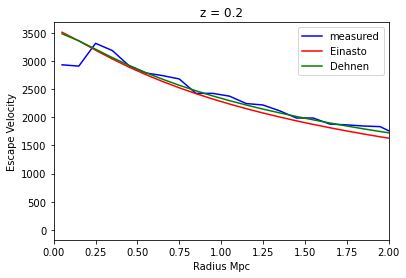

In [29]:
j=7
plt.title ('z = 0.2')
plt.plot(rad_z02[j,:], m_edge_z02[j,:], color = 'b', label = 'measured')
plt.plot(rad_z02[j,:], vesc_02_EIN[j,:], color = 'r', label = 'Einasto')
plt.plot(rad_z02[j,:], vesc_02_DEH[j,:], color = 'g', label = 'Dehnen')
plt.xlim(0,2)
plt.xlabel('Radius Mpc')
plt.ylabel('Escape Velocity')
plt.legend()
plt.show()

#### z = 0.4

In [30]:
z = 0.401674
h_0 = 0.71
mass = cluster_list_z04['m200crit']
hmass = mass/h_0
#print (hmass)
M200 = hmass*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print ('Astropys critical density: ', rho_crit)
print ('Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM'))
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
#print ('Spherical R200 for a given M200: ', R200crit)
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
#print ('Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name)
#print ('q = ', q_z_function(z, cosmo_params,cosmo.name))
#print ('r_eq = ', r_eq(0.2,M200_orig,cosmo_params, cosmo.name))

Astropys critical density:  204879112418.4049 solMass / Mpc3
Internal critical density:  204879112418.4049 solMass / Mpc3


In [37]:
z_04 = np.array((0.401674))
z_04 = np.repeat(z_04,(246))
num_clus = len(z_04)
M200_orig = np.repeat(hmass,len(z_04))
M200_use = np.repeat(hmass,(1))
R200 =  ((3*M200)/(4*np.pi*200.* rho_crit))**(1./3.)
N = np.repeat(1000000,len(z_04))

rho_0_list = density_prof_z04['rho_0']
h_list = density_prof_z04['h']
n_list = density_prof_z04['n']
rho_0 = np.repeat(rho_0_list, (1))
h = np.repeat(h_list, (1))
n = np.repeat(n_list, (1))

gamma_list = dehnen_prof_z04['gamma']
mass0_list = dehnen_prof_z04['mass0']
r_s_list = dehnen_prof_z04['r_s']
gamma = np.repeat(gamma_list, (1))
mass_0 = np.repeat(mass0_list, (1))
r_s = np.repeat(r_s_list, (1))

radius_array = rad_z04 #specify radius array for profiles. used in v_esc(r) funcs below.
radial_bins = 80
xdata = np.zeros((len(z_04),radial_bins))
for i in range(len(z_04)):
    #print (radius_array[i,:])
    xdata[i,:] = radius_array[i,:] /D_A(z_04[i], cosmo_params, cosmo.name).value
    #print (xdata[i,:])
r_04_DEH,vesc_04_DEH = v_esc_dehnen(xdata,z_04,mass_0,r_s,gamma,N, cosmo_params, cosmo_name, num_clus)
r_04_EIN, vesc_04_EIN = v_esc_einasto(xdata,z_04,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
r_04_NFW, vesc_04_NFW = v_esc_NFW_M200(xdata,z_04,M200_use,N,cosmo_params, cosmo_name, num_clus)

In [38]:
np.savetxt('vesc_ein_M0z04.txt', vesc_04_EIN)
print(r_04_EIN,vesc_04_EIN)

[[0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 ...
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]] [[4022.75727758 3832.020893   3630.83228338 ...  518.42502389
   506.81931555  495.35334192]
 [4202.73871841 4062.19145409 3908.00075922 ...  781.5785823
   768.04947114  754.69081727]
 [4120.70698373 3956.20817818 3776.7925823  ...  618.98243831
   606.60828555  594.38732528]
 ...
 [2680.07035296 2574.00201621 2463.06802293 ...  334.45227283
   324.39027054  314.4358258 ]
 [3698.29223819 3463.41844157 3226.18146067 ...  315.91546623
   305.90187145  295.99902061]
 [3089.73983851 2932.88704964 2769.67125685 ...  288.83605925
   279.04632233  269.36274732]]


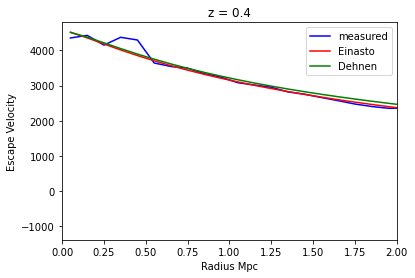

In [39]:
j=3
plt.title ('z = 0.4')
plt.plot(rad_z04[j,:], m_edge_z04[j,:], color = 'b', label = 'measured')
plt.plot(rad_z04[j,:], vesc_04_EIN[j,:], color = 'r', label = 'Einasto')
plt.plot(rad_z04[j,:], vesc_04_DEH[j,:], color = 'g', label = 'Dehnen')
plt.xlim(0,2)
plt.xlabel('Radius Mpc')
plt.ylabel('Escape Velocity')
plt.legend()
plt.show()

#### z = 0.6

In [40]:
z = 0.618357
h_0 = 0.71
mass = cluster_list_z06['m200crit']
hmass = mass/h_0
#print (hmass)
M200 = hmass*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print ('Astropys critical density: ', rho_crit)
print ('Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM'))
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
#print ('Spherical R200 for a given M200: ', R200crit)
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
#print ('Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name)
#print ('q = ', q_z_function(z, cosmo_params,cosmo.name))
#print ('r_eq = ', r_eq(0.2,M200_orig,cosmo_params, cosmo.name))

Astropys critical density:  259882834494.8134 solMass / Mpc3
Internal critical density:  259882834494.81335 solMass / Mpc3


In [41]:
z_06 = np.array((0.618357))
z_06 = np.repeat(z_06,(249))
num_clus = len(z_06)
M200_orig = np.repeat(hmass,len(z_06))
M200_use = np.repeat(hmass,(1))
R200 =  ((3*M200)/(4*np.pi*200.* rho_crit))**(1./3.)
N = np.repeat(1000000,len(z_06))

rho_0_list = density_prof_z06['rho_0']
h_list = density_prof_z06['h']
n_list = density_prof_z06['n']
rho_0 = np.repeat(rho_0_list, (1))
h = np.repeat(h_list, (1))
n = np.repeat(n_list, (1))

gamma_list = dehnen_prof_z06['gamma']
mass0_list = dehnen_prof_z06['mass0']
r_s_list = dehnen_prof_z06['r_s']
gamma = np.repeat(gamma_list, (1))
mass_0 = np.repeat(mass0_list, (1))
r_s = np.repeat(r_s_list, (1))

radius_array = rad_z06 #specify radius array for profiles. used in v_esc(r) funcs below.
radial_bins = 80
xdata = np.zeros((len(z_06),radial_bins))
for i in range(len(z_06)):
    #print (radius_array[i,:])
    xdata[i,:] = radius_array[i,:] /D_A(z_06[i], cosmo_params, cosmo.name).value
    #print (xdata[i,:])
r_06_DEH,vesc_06_DEH = v_esc_dehnen(xdata,z_06,mass_0,r_s,gamma,N, cosmo_params, cosmo_name, num_clus)
r_06_EIN, vesc_06_EIN = v_esc_einasto(xdata,z_06,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
r_06_NFW, vesc_06_NFW = v_esc_NFW_M200(xdata,z_06,M200_use,N,cosmo_params, cosmo_name, num_clus)

In [42]:
np.savetxt('vesc_ein_M0z06.txt', vesc_06_EIN)
print(r_06_EIN,vesc_06_EIN)

[[0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 ...
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]
 [0.05 0.15 0.25 ... 7.75 7.85 7.95]] [[3485.28528252 3293.85728035 3096.99781227 ...  459.80041131
   451.03085407  442.37247511]
 [2601.34292171 2458.1324908  2313.39236701 ...  289.63630043
   282.1971132   274.84426509]
 [2812.60444245 2622.50078051 2434.30027782 ...  256.80538546
   249.62169385  242.51988562]
 ...
 [3578.55771082 3390.02431966 3194.4705162  ...  494.7337135
   485.69593563  476.774254  ]
 [3820.93235892 3648.46444095 3466.46823435 ...  628.52121994
   618.47324476  608.55942051]
 [3114.34767093 2980.13854835 2841.55081268 ...  520.46949331
   511.27992825  502.20709549]]


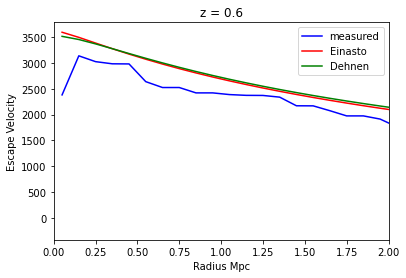

In [23]:
j=47
plt.title ('z = 0.6')
plt.plot(rad_z04[j,:], m_edge_z04[j,:], color = 'b', label = 'measured')
plt.plot(rad_z04[j,:], vesc_04_EIN[j,:], color = 'r', label = 'Einasto')
plt.plot(rad_z04[j,:], vesc_04_DEH[j,:], color = 'g', label = 'Dehnen')
plt.xlim(0,2)
plt.xlabel('Radius Mpc')
plt.ylabel('Escape Velocity')
plt.legend()
plt.show()

## Now Compare the Velocities

In [24]:
perc_diff_M0 = []
median_perc_diff_M0 = []
median_high_M0 = []
median_low_M0 = []

for j in range(len(z_0)):
    pd_0 = (vesc_M0_EIN[j,:]-m_edge_0[j,:])/m_edge_0[j,:]
    perc_diff_M0.append(pd_0)
    
perc_diff_arr_M0 = np.array(perc_diff_M0)

for m in range(80):
    median = np.percentile(perc_diff_arr_M0[:,m],50)
    median_perc_diff_M0.append(median)
    median_high = np.percentile(perc_diff_arr_M0[:,m],83.5)
    median_high_M0.append(median_high)
    median_low = np.percentile(perc_diff_arr_M0[:,m],16.5)
    median_low_M0.append(median_low)

<ipython-input-24-581c09eb5d66>:7: RuntimeWarning: divide by zero encountered in true_divide
  pd_0 = (vesc_M0_EIN[j,:]-m_edge_0[j,:])/m_edge_0[j,:]
/u/home/pvans/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [25]:
perc_diff_z02 = []
perc_diff_z04 = []
perc_diff_z06 = []
median_perc_diff_z02 = []
median_perc_diff_z04 = []
median_perc_diff_z06 = []
med_z02_low = []
med_z04_low = []
med_z06_low = []
med_z02_high = []
med_z04_high = []
med_z06_high = []

for j in range(len(z_02)):
    pd_z02 = (vesc_02_EIN[j,:]-m_edge_z02[j,:])/m_edge_z02[j,:]
    perc_diff_z02.append(pd_z02)
for k in range(len(z_04)):
    pd_z04 = (vesc_04_EIN[k,:]-m_edge_z04[k,:])/m_edge_z04[k,:]
    perc_diff_z04.append(pd_z04)
for l in range(len(z_06)):
    pd_z06 = (vesc_06_EIN[l,:]-m_edge_z06[l,:])/m_edge_z06[l,:]
    perc_diff_z06.append(pd_z06)
    
perc_diff_arr_z02 = np.array(perc_diff_z02)
perc_diff_arr_z04 = np.array(perc_diff_z04)
perc_diff_arr_z06 = np.array(perc_diff_z06)

for m in range(80):
    median_2 = np.percentile(perc_diff_arr_z02[:,m],50)
    median_perc_diff_z02.append(median_2)
    median_4 = np.percentile(perc_diff_arr_z04[:,m],50)
    median_perc_diff_z04.append(median_4)
    median_6 = np.percentile(perc_diff_arr_z06[:,m],50)
    median_perc_diff_z06.append(median_6)
    med_2_high = np.percentile(perc_diff_arr_z02[:,m],83.5)
    med_z02_high.append(med_2_high)
    med_4_high = np.percentile(perc_diff_arr_z04[:,m],83.5)
    med_z04_high.append(med_4_high)
    med_6_high = np.percentile(perc_diff_arr_z06[:,m],83.5)
    med_z06_high.append(med_6_high)
    med_2_low = np.percentile(perc_diff_arr_z02[:,m],16.5)
    med_z02_low.append(med_2_low)
    med_4_low = np.percentile(perc_diff_arr_z04[:,m],16.5)
    med_z04_low.append(med_4_low)
    med_6_low = np.percentile(perc_diff_arr_z06[:,m],16.5)
    med_z06_low.append(med_6_low)

<ipython-input-25-61d228fc799c>:15: RuntimeWarning: divide by zero encountered in true_divide
  pd_z02 = (vesc_02_EIN[j,:]-m_edge_z02[j,:])/m_edge_z02[j,:]
<ipython-input-25-61d228fc799c>:18: RuntimeWarning: divide by zero encountered in true_divide
  pd_z04 = (vesc_04_EIN[k,:]-m_edge_z04[k,:])/m_edge_z04[k,:]
<ipython-input-25-61d228fc799c>:21: RuntimeWarning: divide by zero encountered in true_divide
  pd_z06 = (vesc_06_EIN[l,:]-m_edge_z06[l,:])/m_edge_z06[l,:]


In [32]:
z02_z0 = [a-b for a,b in zip(median_perc_diff_z02, median_perc_diff_M0)]

print(z02_z0)

[0.019003431811524973, 0.002799945547842138, -0.0026015795524956626, -0.015749740560153637, -0.005874610479798778, 0.004755053353397428, -0.001263094652641416, 0.005628784676726548, -0.00023822027174040528, 0.0011142788213332755, 0.0005333801880016507, 0.006260822264399112, 0.0028823348247489274, 0.0008673379236913978, 0.010080767280326575, 0.011455882062762398, -0.0015926525118239387, 0.009028341984706516, 0.002869232923508383, 0.012126461972522417, 0.015570095275991848, 0.020638799212958678, 0.02945496942471966, 0.03381092919766757, 0.04823689351319534, 0.053482014194742786, 0.061346975889473375, 0.06463472281251768, 0.0755798660342154, 0.12155316175400845, 0.12645092050612147, 0.11942143465559212, 0.08126562047683297, 0.06319154395324407, 0.01756325375639895, 0.024526912205992783, -0.09615966802409984, -0.08962102567651692, -0.16153194172780788, -0.2245784722194087, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

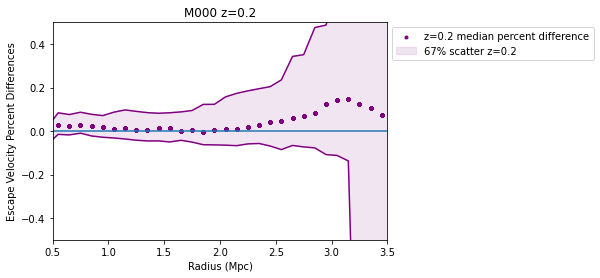

In [22]:
plt.title('M000 z=0.2')
plt.xlabel('Radius (Mpc)')
plt.ylabel('Escape Velocity Percent Differences')
for (j,k) in zip(range(len(z_02)), range(80)):
    if(j==0):
        plt.axhline(0)
        plt.scatter(rad_z02[j,:], median_perc_diff_z02, color = 'purple', marker = '.', label = 'z=0.2 median percent difference')
    else:
        plt.scatter(rad_z02[j,:], median_perc_diff_z02, color = 'purple', marker = '.')
        
plt.plot(rad_z02[0], med_z02_high, color = 'purple')
plt.plot(rad_z02[0], med_z02_low, color = 'purple')
plt.fill_between(rad_z02[0], med_z02_low, med_z02_high, color = 'purple', alpha = 0.1, label = '67% scatter z=0.2')

plt.xlim(0.5,3.5)
plt.ylim(-0.5,0.5)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.savefig('M0z02_einasto.png', dpi = 200)
plt.show()

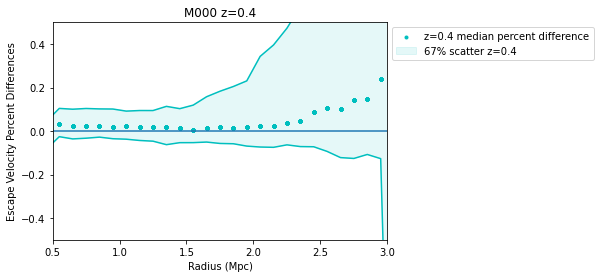

In [23]:
plt.title('M000 z=0.4')
plt.xlabel('Radius (Mpc)')
plt.ylabel('Escape Velocity Percent Differences')

for (l,k) in zip(range(len(z_04)), range(80)):
    if(l==0):
        plt.axhline(0)
        plt.scatter(rad_z04[l,:], median_perc_diff_z04, color = 'c', marker = '.', label = 'z=0.4 median percent difference')
    else:
        plt.scatter(rad_z04[l,:], median_perc_diff_z04, color = 'c', marker = '.')        

plt.plot(rad_z04[0], med_z04_high, color = 'c')
plt.plot(rad_z04[0], med_z04_low, color = 'c')
plt.fill_between(rad_z04[0], med_z04_low, med_z04_high, color = 'c', alpha = 0.1, label = '67% scatter z=0.4')

plt.xlim(0.5,3)
plt.ylim(-0.5,0.5)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.savefig('M0z04_einasto.png', dpi = 200)
plt.show()

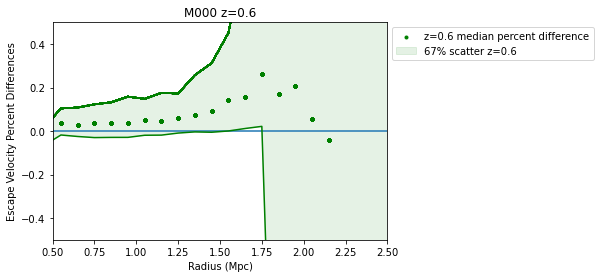

In [24]:
plt.title('M000 z=0.6')
plt.xlabel('Radius (Mpc)')
plt.ylabel('Escape Velocity Percent Differences')

for (m,k) in zip(range(len(z_06)), range(80)):
    if(m==0):
        plt.axhline(0)
        plt.scatter(rad_z06[m,:], median_perc_diff_z06, color = 'g', marker = '.', label = 'z=0.6 median percent difference')
    else:
        plt.scatter(rad_z06[m,:], median_perc_diff_z06, color = 'g', marker = '.')        

        plt.plot(rad_z06[0], med_z06_high, color = 'g')
plt.plot(rad_z06[0], med_z06_low, color = 'g')
plt.fill_between(rad_z06[0], med_z06_low, med_z06_high, color = 'g', alpha = 0.1, label = '67% scatter z=0.6')

plt.xlim(0.5,2.5)
plt.ylim(-0.5,0.5)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.savefig('M0z06_einasto.png', dpi = 200)
plt.show()

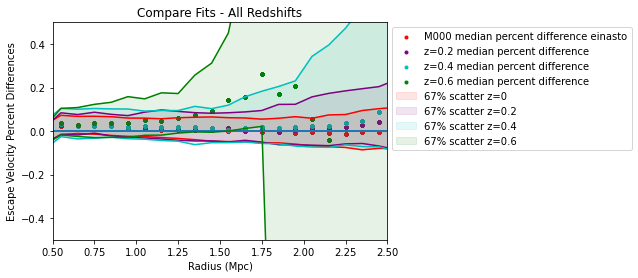

In [38]:
plt.title('Compare Fits - All Redshifts')
plt.xlabel('Radius (Mpc)')
plt.ylabel('Escape Velocity Percent Differences')
for (i,k) in zip(range(len(z_0)), range(80)):
    if(i==0):
        plt.axhline(0)
        plt.scatter(rad_0[i,:], median_perc_diff_M0, color = 'r', marker = '.', label = 'M000 median percent difference einasto')
    else:
        plt.axhline(0)
        plt.scatter(rad_0[i,:], median_perc_diff_M0, color = 'r', marker = '.')

for (j,k) in zip(range(len(z_02)), range(80)):
    if(j==0):
        plt.axhline(0)
        plt.scatter(rad_z02[j,:], median_perc_diff_z02, color = 'purple', marker = '.', label = 'z=0.2 median percent difference')
    else:
        plt.scatter(rad_z02[j,:], median_perc_diff_z02, color = 'purple', marker = '.')        
    
for (l,k) in zip(range(len(z_04)), range(80)):
    if(l==0):
        plt.axhline(0)
        plt.scatter(rad_z04[l,:], median_perc_diff_z04, color = 'c', marker = '.', label = 'z=0.4 median percent difference')
    else:
        plt.scatter(rad_z04[l,:], median_perc_diff_z04, color = 'c', marker = '.')        

for (m,k) in zip(range(len(z_06)), range(80)):
    if(m==0):
        plt.axhline(0)
        plt.scatter(rad_z06[m,:], median_perc_diff_z06, color = 'g', marker = '.', label = 'z=0.6 median percent difference')
    else:
        plt.scatter(rad_z06[m,:], median_perc_diff_z06, color = 'g', marker = '.')        

plt.plot(rad_0[0], median_high_M0, color = 'r')
plt.plot(rad_0[0], median_low_M0, color = 'r')
plt.fill_between(rad_0[0], median_low_M0, median_high_M0, color = 'r', alpha = 0.1, label = '67% scatter z=0')
plt.plot(rad_z02[0], med_z02_high, color = 'purple')
plt.plot(rad_z02[0], med_z02_low, color = 'purple')
plt.fill_between(rad_z02[0], med_z02_low, med_z02_high, color = 'purple', alpha = 0.1, label = '67% scatter z=0.2')
plt.plot(rad_z04[0], med_z04_high, color = 'c')
plt.plot(rad_z04[0], med_z04_low, color = 'c')
plt.fill_between(rad_z04[0], med_z04_low, med_z04_high, color = 'c', alpha = 0.1, label = '67% scatter z=0.4')
plt.plot(rad_z06[0], med_z06_high, color = 'g')
plt.plot(rad_z06[0], med_z06_low, color = 'g')
plt.fill_between(rad_z06[0], med_z06_low, med_z06_high, color = 'g', alpha = 0.1, label = '67% scatter z=0.6')

plt.xlim(0.5,2.5)
plt.ylim(-0.5,0.5)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.savefig('M0_redshift_comp_einasto.png', dpi = 200)
plt.show()

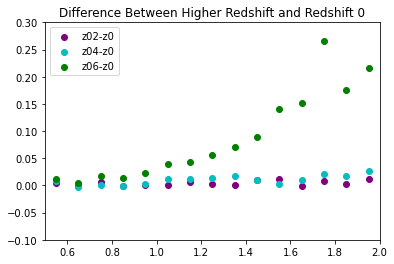

In [39]:
z02_z0 = [a-b for a,b in zip(median_perc_diff_z02, median_perc_diff_M0)]
z04_z0 = [a-b for a,b in zip(median_perc_diff_z04, median_perc_diff_M0)]
z06_z0 = [a-b for a,b in zip(median_perc_diff_z06, median_perc_diff_M0)]

plt.scatter(rad_0[0], z02_z0, color = 'purple', label = 'z02-z0')
plt.scatter(rad_0[0], z04_z0, color = 'c', label = 'z04-z0')
plt.scatter(rad_0[0], z06_z0, color = 'g', label = 'z06-z0')
plt.xlim(0.5,2)
plt.ylim(-0.1, 0.3)
plt.title('Difference Between Higher Redshift and Redshift 0')
plt.savefig('M000_redshift_differences.png', dpi = 200)
plt.legend()
plt.show()